# Climate Data – A hands-on python course
Author: Pedro Herrera Lormendez (pedrolormendez@gmail.com)

## Time series and 2D visualization

### Importing the neccessary modules

In [3]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
#import cartopy.crs as ccrs
sys.path.append(os.path.abspath('../help_code'))
import tools

### Reading the netcdf file

Using the monthly Global surface temperature data: GISTEMP: NASA Goddard Institute for Space Studies (GISS) Surface Temperature Analys: https://climatedataguide.ucar.edu/climate-data/global-surface-temperature-data-gistemp-nasa-goddard-institute-space-studies-giss
- Download the dataset: https://downloads.psl.noaa.gov/Datasets/gistemp/combined/250km/air.2x2.250.mon.anom.comb.nc
- Save it in the "data" folder

In [6]:
# Definging the file path
file_path = "../data/air.2x2.250.mon.anom.comb.nc"
# Reading the netcdf file using xarray
DS = xr.open_dataset(file_path, engine='netcdf4')
# Fixing the longitude coordinates
DS = tools.convert_and_sort_coords(DS)
DS #Monthly resolution data

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 1727)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2023-11-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. Converted to chunked, def...
    dataset_title:  GISS Surface Temperature Analysis
    comments:       This is the 1200km smoothed combined land,ocean version o...
    References:     https://www.psl.noaa.gov/data/gridded/data.gistemp.html
    update_date:    12/2023
    data_modified:  2023-12-14

### Timeseries

#### Extracting the spatial mean
Extracting the temperature variable (air) and computing the spatial (lat, lon) mean value of the data.

In [9]:
# Extracting the t2m variable
t2m = DS.air
# Computing the spatial mean (lat and lon)
t2m_mean = t2m.mean(dim=('lat', 'lon'))
print(f"The shape of t2m_mean variable is {t2m_mean.shape}")

The shape of t2m_mean variable is (1727,)


#### Using matplotlib to plot the data

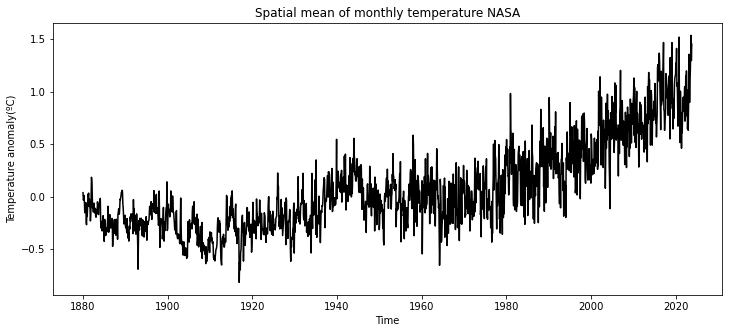

In [29]:
plt.figure(figsize=(12,5))
# plt.plot(x ,y)
x = t2m_mean.time
y = t2m_mean.values
#plt.plot(x, y, color='k', linestyle='--', marker = '.')
plt.plot(x,y, color='k')
# Add axis information
plt.xlabel('Time')
plt.ylabel('Temperature anomaly(ºC)')
plt.title('Spatial mean of monthly temperature NASA')
plt.show()

#### Smoothing
Smothing help us to visually detect patterns and trends to see a clearer signal in a timeseries. A very conventional method is the moving average. The 'moving average' refers to the process where, at any given moment, we calculate the (potentially weighted) averages of values in proximity to a specific point in time. For example, a moving average  at time _t_ with a window of 3, would imply the average of _t - 1_, _t_ and _t + 1_ 
[DataArray.rolling().mean()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.rolling.html)

In [35]:
t2m_mean

<xarray.DataArray 'air' (time: 1727)>
array([ 0.03749842, -0.03225649, -0.02445293, ...,  1.5360194 ,
        1.2959914 ,  1.4523423 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2023-11-01

In [31]:
# Smothing seasonal variations using a 1-year moving average
# Computing the 12-mothly moving average
t2m_year_mean = t2m_mean.rolling(time = 12, center = True).mean()


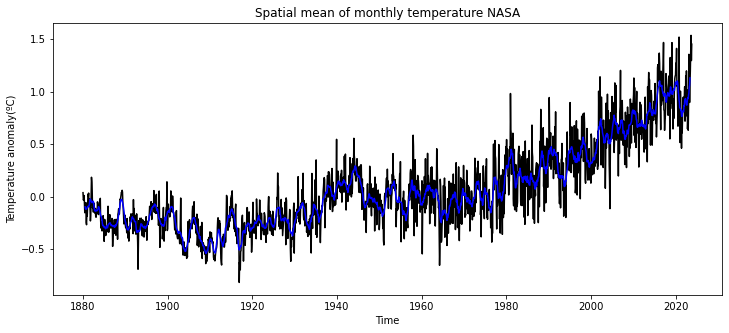

In [33]:
plt.figure(figsize=(12,5))
# plt.plot(x ,y)
x = t2m_mean.time
y = t2m_mean.values
#plt.plot(x, y, color='k', linestyle='--', marker = '.')
plt.plot(x,y, color='k')
plt.plot(x, t2m_year_mean, color = 'b')
# Add axis information
plt.xlabel('Time')
plt.ylabel('Temperature anomaly(ºC)')
plt.title('Spatial mean of monthly temperature NASA')
plt.show()

<div style="background-color:lightgreen; padding:10px">

A 30-year moving average helps in understanding long-term climatic trends. It helps to reveal long-term trends in the data. It smooths out short-term variations, including annual and inter-annual fluctuations, making it easier to observe underlying patterns and trends that unfold over multiple decades.
        <ul>
        <li>Compute the 30-year moving average. Make sure it is centered.</li>
        <li>Plot the 30-year moving average on top of the figure below</li>
            <li>Add color and appropiate label to the new lineplot</li>
    </ul>
</div>

In [36]:
# Your code to compute the 30-year moving average goes here
t2m_30year_mean = t2m_mean.rolling(time=360, center = True).mean()

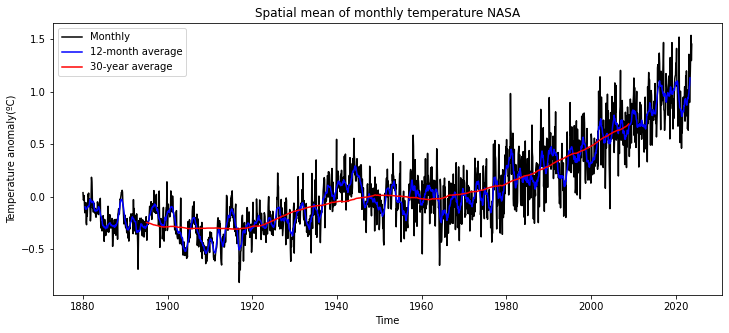

In [40]:
plt.figure(figsize=(12,5))
# plt.plot(x ,y)
x = t2m_mean.time
y = t2m_mean.values
#plt.plot(x, y, color='k', linestyle='--', marker = '.')
plt.plot(x,y, color='k', label = 'Monthly')
plt.plot(x, t2m_year_mean, color = 'b', label='12-month average')
# 30-year rolling mean
plt.plot(x, t2m_30year_mean, color ='r', label = '30-year average')
# Add axis information
plt.xlabel('Time')
plt.ylabel('Temperature anomaly(ºC)')
plt.title('Spatial mean of monthly temperature NASA')
plt.legend()
plt.show()

#### Trend analysis
Linear regression analysis is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

$Y = mx + b$

Using Scipy linregress function [scipy.stats.linregress()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [ ]:
# !pip install scipy

In [48]:
# importing scipy
from scipy import stats
# extract the value from the DataArray
data_values = t2m_mean.values
# Extract a list of values with the lenght of the time indices
time_indices = np.arange(len(data_values))
print(f"The time_indices is {time_indices}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(time_indices, data_values)

# Calculate the trend line
trend_line = slope * time_indices + intercept

# Create a new DataArray for the trend line
trend_data_array = xr.DataArray(trend_line, coords={'time': t2m_mean.time}, dims=['time'])
trend_data_array
# Compute the R-squared value to asses the goodness of the fit
r_squared = r_value ** 2

print("Slope (trend):", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

The time_indices is [   0    1    2 ... 1724 1725 1726]
Slope (trend): 0.0006599011148263516
Intercept: -0.49701974283559325
R-squared: 0.6238690465140327


##### Plotting the linear trend
<div style="background-color:lightgreen; padding:10px">
        <li>Plot the linear trend line</li>
        <li>Add appropiate labels</li>
</div>

In [ ]:
# Data with the linear trend values 
trend_data_array

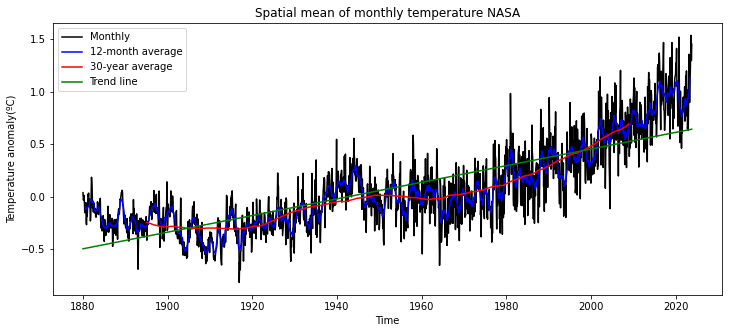

In [51]:
plt.figure(figsize=(12,5))
# plt.plot(x ,y)
x = t2m_mean.time
y = t2m_mean.values
#plt.plot(x, y, color='k', linestyle='--', marker = '.')
plt.plot(x,y, color='k', label = 'Monthly')
# 12-month rolling mean
plt.plot(x, t2m_year_mean, color = 'b', label='12-month average')
# 30-year rolling mean
plt.plot(x, t2m_30year_mean, color ='r', label = '30-year average')
# Linear trend
plt.plot(trend_data_array.time, trend_data_array.values, color ='g', label='Trend line')
# Add axis information
plt.xlabel('Time')
plt.ylabel('Temperature anomaly(ºC)')
plt.title('Spatial mean of monthly temperature NASA')
plt.legend()
plt.savefig('Timeseries.png', dpi=300)
plt.show()

### 2D visualization
Matplotlib and Cartopy allows us to plot 2D and 3D geoespatial data over a map. 2D maps require two dimensions (x and y), usually latititude and longitude, in order to be plotted over a map.

#### Extracting a 2D DataArray

In [1]:
# importing the cartopy module
import cartopy.crs as ccrs

In [4]:
# Definging the file path
file_path = '../data/sample.nc'
# Reading the netcdf file using xarray
DS = xr.open_dataset(file_path)
# Fixing the longitude coordinates
DS = tools.convert_and_sort_coords(DS)
# Extracting the t2m variable
t2m = DS.t2m
print(t2m)

<xarray.DataArray 't2m' (time: 96, lat: 90, lon: 180)>
[1555200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-07-17 ... 2022-07-20T23:00:00
  * lon      (lon) float64 -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    long_name:  2 metre temperature
    units:      K


In [7]:
# Extracting a 2D DataArray from the t2m variable
print(f"The t2m variable has the following shape: {t2m.shape} with dimensions: {t2m.dims}")
t2m_2d = t2m.sel(time='2022-07-19T15:00:00.000000000').squeeze()
print(f"The t2m_2d variable has a shape of {t2m_2d.shape} with dimensions: {t2m_2d.dims}")

The t2m variable has the following shape: (96, 90, 180) with dimensions: ('time', 'lat', 'lon')
The t2m_2d variable has a shape of (90, 180) with dimensions: ('lat', 'lon')


#### Plotting the 2D data with cartopy and matplotlib
- Colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Plotting gridded data with matplotlib: https://matplotlib.org/stable/plot_types/arrays/index.html

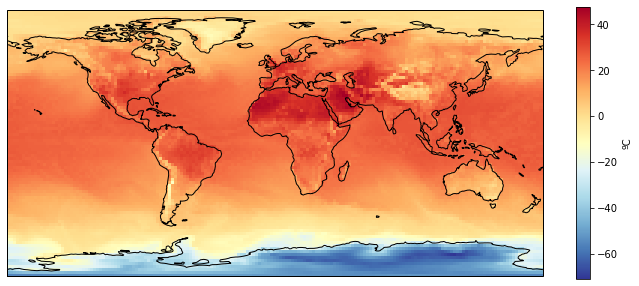

In [8]:
# Plotting the data on a map using Cartopy
projection = ccrs.PlateCarree()  # This is a common projection for geographical data
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': projection})
ax.coastlines()
# Extracting longitude and latitude coordinates values
lons = t2m_2d.lon
lats = t2m_2d.lat
# Using matplotlib
# plot.pcolor(x,y,z)
plt.pcolor(lons, lats, t2m_2d-273.15, cmap ='RdYlBu_r', transform= ccrs.PlateCarree())
# plt.contourf(x,y,z)
# plt.contourf(lons, lats, t2m_2d-273.15, cmap = 'RdYlBu_r')
plt.colorbar(label='ºC')
plt.show()

#### Plotting over a smaller region
Using ```ax.set_extent([west, east, south, north])```

In [186]:
# Run if issues appear related to shapely
# !pip install --upgrade cartopy shapely

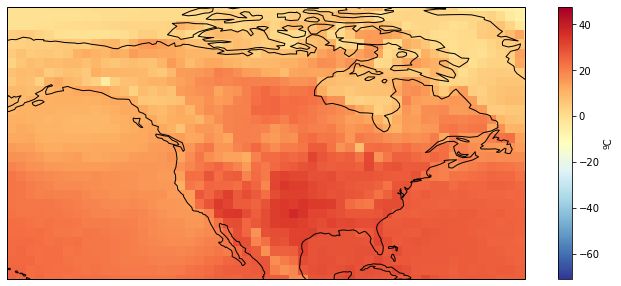

In [9]:
# Plotting the data on a map using Cartopy
projection = ccrs.PlateCarree()  # This is a common projection for geographical data
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': projection})
ax.coastlines()
# Extracting longitude and latitude coordinates values
lons = t2m_2d.lon
lats = t2m_2d.lat
# Example for North America ax.set_extent([west, east, south, north])
ax.set_extent([-160, -50, 20, 70])  
# Using matplotlib
# plot.pcolor(x,y,z)
plt.pcolor(lons, lats, t2m_2d-273.15, cmap ='RdYlBu_r', transform= ccrs.PlateCarree())
# plt.contourf(x,y,z)
# plt.contourf(lons, lats, t2m_2d-273.15, cmap = 'RdYlBu_r')
plt.colorbar(label='ºC')
plt.show()

#### Other map projections
- List of map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

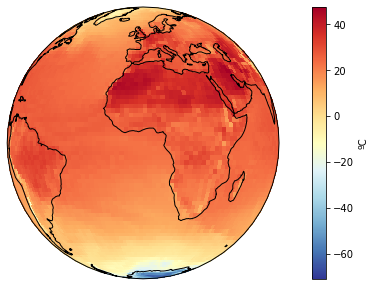

In [11]:
projection = ccrs.Orthographic()  # This is a common projection for geographical data
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': projection})
ax.coastlines()
# Extracting longitude and latitude coordinates values
lons = t2m_2d.lon
lats = t2m_2d.lat
# Using matplotlib
# plot.pcolor(x,y,z)
plt.pcolor(lons, lats, t2m_2d-273.15, cmap ='RdYlBu_r', transform= ccrs.PlateCarree())
# plt.contourf(x,y,z)
# plt.contourf(lons, lats, t2m_2d-273.15, cmap = 'RdYlBu_r')
plt.colorbar(label='ºC')
plt.show()